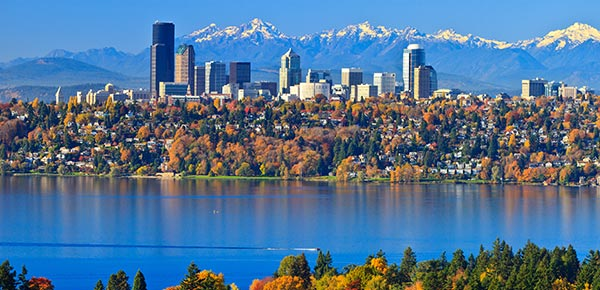

# Cohabitational Housing for Single Mother's in King’s County, WA
Data Analysis for CoAbode.org


## Overview

We have been brought in by our client, CoAbode.org, in order to help them find suitable housing for their customers, single mothers who are looking to cohabitate. We have taken housing data from a specified test area, King County, WA, to determine which factors are most important when projecting housing price, so we could evaluate whether the factors these families are looking for are attainable within the pricing range's they can afford.


## Business Problem

Our stakeholders are CoAbode, a social networking service that matches single mothers who are interested in co-habitating in order to share their financial, parental, and time responsibiities. 

According to 2022 U.S. Census Bureau data, out of about 11 million single parent families with children under the age of 18, nearly 80 percent were headed by single mothers. Almost 25% of those single-mother families were food insecure and a single mother spends about 40% of her yearly income JUST on childcare. Some staggering statistics that could be remedied by a cohabitual living stituation.

CoAbode has the connective resources to match people, but lack the resources to match those people with homes that fall within their respective budgets. We are taking a test area in Washingtom state to analyze housing prices, and the factors that come into play in regards to the cost of housing in this particular area, in the hopes of finding appropriate family homes within their customers budget. If it is successful, we hope to help them launch a similar model across ther whole territory, which spans across the US and Canada.

We would like to help them expand their range of services so that they can become a one-stop-shop for single mothers looking for co-habitation, as well as other demographic groups in the future as they grow their offerings.

## Data Understanding

We are utilizing two different data sets for this project. A King County house sales data set, which comes from the King County governement website. We have also pulled report card data by school and school district for King County for 2021-2022 from https://data.wa.gov/.
 
The initial data set represents individual homes within King County, including information such as price, square footage, address, etc. The report card data includes a breakdown of scores by student demographic for each school in King County.
 
Our target variable is price, as we are trying to predict the value of homes that include the certain specifications that their customers are looking for or need, that as well fall within their budget range.

To achieve this we are running our topline models using most of the variables within the dataset, as well as some additional parameters that were brought in with the addtion of our report card dataset. Once this data is modeled, we plan on shifting our focus to just houses including four bedrooms or more (to accommodate two single parents and their kids), houses that are in a quiet neighborhood, that are in a good school district, and that are affordable.

## Data Preparation

Upon exloring the house sales data, there were a few matters that we needed to address. We had a duplicate account, which we dropped, as well as about 40 null variables from our heat source and sewer type columns that we removed, resulting in a loss of 44 rows. We also split our address column, to create a separate zip code column, which we plan to use for when we pull in our other dataset of school district test scores.

We had some missing values, as the column_names.md file that accompanied the House Sales dataset stated "In some cases due to missing or incorrectly-entered data from the King County Assessor, this API returned locations outside of King County, WA." This meant that we needed to remove houses from our dataset that are not in King County, WA. We pulled zip code information for the county from https://statisticalatlas.com/county/Washington/King-County/Overview and compiled King County zip codes into a list to use to subset data frame for only houses that have a zip code in King_County_WA_zipcodes. Once completing this we found that we needed to remove the data of 69 homes.

Also, we found that technically Fife School District is in both Pierce and King counties. In the `schools_df` it is listed as being in Pierce County, but we have decided to include it so that the King County houses with zip codes corresponding to the Fife School District will be included in our overall dataset.

Our school dataset also included some college's and charter school's that are not specific school districts, so we dropped this data in order to account for school districts in King County specifically. As well, we only care about the overall scores of each school district, not the scores of each demographic, so we subset our dataframe for district totals for 'All Students' and 'All Grades'. Once we had done this, we noticed that each district had two scores for each test subject. These duplicates seemed to happen because of different tests or groups. By researching the Test Administration, we found that the AIM Scores are for kids with cognitive disabilities and that this group has far fewer students in their count than the others. So, we decided to separate these scores and use just the non-AIM scores (SBAC and WCAS) for our overall rating of a school district, as these contained a higher count of students and was more statistcally significant to our dataset. Lastly, for comparison purposes, we created another column with the overall district test score called `District Test Score` which averaged the scores between Math, English, and Science for each school district.

After we finished cleaning and preparing both datasets, we joined them by `DistrictName` so that every house has a column with it's appropriate school district, for which you can see the average scores for that district.

We felt that these decisions were appropriate based on the data and our business direction, as we wanted to make sure that we weren't accounting for data on homes that fell outside of the county we are analyzing. As well, if a home didn't account for a power source of sewer system, we felt that it was appropriate to drop, as the families we are modeling for need a fully funtioning house that is ready to go. And lastly when it came to the test score dataset, we wanted to make our initial model off the largest group of students to support our model. For the future we can potentially look int these different testing groups (AIM, SBAC, and WCAS) to see how each of their test scores affect the data.

## Modeling

Looking at the correlation between housing price and square footage, we found a positive correlation between the two featres and an over-all positive skew in the pricing data, with a few outliers.

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

Our assumption without modeling would be that the larger a home, the higher the price.

### First  Model

- Used only continuous variable data where we have integer or float values.
- Didn't use Science Test Scores due to its Null values since Skykomish School District does not have scores.

#### 
Our First Model explained 51% of the variance in House Sale Price but has the potential to be off by $352,353 in its predictions of house price.

### Modeling Iterations

Before we created another model, we looked for Multicollinearity and ensured that our predictive variables were indeed independent.

We found that `sqft_above` had a strong positive correlation with `sqft_living`, so we decided that we should likely avoid using them both. We decided to move forward with `sqft_living`.

### Second Model

- Added in categorical data to our model 
- Dropped `sqft_above` as it too closely correlated with `sqft_living`. 
- Again we removed `Science` as it contains null values due to Skykomish School District not having scores.

####
Our Second Model did better than the First and explained 59% of the variance in House Sale Price.

### Third Model

- Limited continuous variables to top three most correlated numeric variables: `bathrooms`,`sqft_living`,`sqft_patio`

####
Our Third Model jumped quite a bit and now explains 64% of the variance in House Sale Price.

### 'Final' Model

- Log transformed the `price` data
- Added in binary variables (`waterfront`, `greenbelt`,`nuisance`)
- Added the ordinal variable `view`
- Limited the nominal variables to `Zip Code` and `heat_source`

####
With these parameters, our Final Model jumped a bit more and now explains 70.5% of the variance in House Sale Price. Our mean absolute error is much better than our First Model decreasing from $\$352,353 to $\$225,622.

## Conclusions

We would recommend that cohabiting single mothers looking to co-purchase a family home in King County, Washington consider looking in the Mercer Island School District as there are a considerable number of undervalued family houses and the schools have the best test scores in the county.

Our analysis was limited to data from house sales in King County, Washington and so might not be applicable to other localities as other predictive variables may be more influential on housing prices in that particular area.

Finally, we would continue working on simplifying our model to be able to specify which house features are most important to the overall value of a house. 